##### Importing data to a dataframe

In [45]:
import pandas as pd
import numpy as np

dfe1 = pd.read_csv("e1_positive.csv")
print(dfe1.head)

<bound method NDFrame.head of          GABRG2       CELF4        SRRM4      SLC1A3      ATP1A3      RBFOX3  \
0     35.038262  161.176004    68.074337   58.063405   20.021864  269.294069   
1     95.324867   75.256474    87.297510    0.000000   18.061554  342.166102   
2    220.143867  187.976727    42.219372  106.553653    0.000000  187.976727   
3    166.010840   26.159284    61.373704    0.000000   30.183789  254.549955   
4    188.426220   71.160966   119.269788   57.129226   16.036274  265.600789   
..          ...         ...          ...         ...         ...         ...   
866  665.606813  101.002551     4.040102    0.000000   95.952424   10.100255   
867   21.157688   45.337903    18.135161    1.007509  290.162582   14.105125   
868    4.111466   81.201453  1704.202638    2.055733    9.250798   75.034254   
869   37.480576  438.624037     0.000000    0.000000   69.896209    3.038966   
870  664.830372   18.214531   138.632817    0.000000  224.645879    0.000000   

         

##### Number of samples and features in data sample with the .shape function.

In [46]:
n_samples, n_features = dfe1.shape
print("Number of data samples: ", n_samples)
print("Number of features: ", n_features)

Number of data samples:  871
Number of features:  609


##### Load packages essential for randomforest classfier froms scikit
Display positive and negative samples
Display missing feature values

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import collections
from sklearn.model_selection import validation_curve

SamplesbyLabel = collections.Counter(dfe1['Label'])
print(SamplesbyLabel)

#MV = pd.concat([dfe1.isnull().sum()], axis = 1, keys = [dfe1])
MV = pd.concat([dfe1.isnull().sum()], axis=1)
print(MV)
print("Missing features")
#print(MV[MV.sum(axis=1)>5])
print("Missing Values: ", dfe1.isnull().values.any())
print("Missing Value Count: ", dfe1.isnull().sum().sum())

Counter({0: 572, 1: 299})
             0
GABRG2       0
CELF4        0
SRRM4        0
SLC1A3       0
ATP1A3       0
...         ..
LINC00639.2  0
SMOC1        0
LINC00498    0
GFRA1        0
Label        0

[609 rows x 1 columns]
Missing features
Missing Values:  False
Missing Value Count:  0


##### Display categorical features

In [64]:
print("Data types of the features:")
print(collections.Counter(dfe1.dtypes))
dfe1.select_dtypes(exclude = ["int_","float_"]).columns

cat_col =[i for i in dfe1.columns if dfe1.dtypes[i] != ("float_")]

print("Number of categorical columns: ", cat_col)


Data types of the features:
Counter({dtype('float64'): 608, dtype('int64'): 1})
Number of categorical columns:  ['Label']


Prepare data for testing and training and look at the shape of all data

In [49]:

X = dfe1.drop("Label", axis = 1)
Y = dfe1["Label"]
Columnlist = list(X.columns) # listing out the feature(column names) from sample dataColumnlist
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.3, shuffle =True) #to make the results deterministic use random_state = 0/42
print("Training data: ", X_train.shape)
print("Testing data ", X_test.shape)
print("Labels in Training Samples ",y_train.shape,"\n",
    "Labels in Testing Samples ", y_test.shape)


Training data:  (609, 608)
Testing data  (262, 608)
Labels in Training Samples  (609,) 
 Labels in Testing Samples  (262,)


##### Instantiate the model and training the data

In [75]:
import collections
model = RandomForestClassifier(n_estimators =5000, max_features = "log2", bootstrap = True, oob_score = True) #oob_score = True
model.fit(X_train,y_train)

print("Training Labels")
print(collections.Counter(y_train))

print("Testing Labels")
print(collections.Counter(y_test))


Training Labels
Counter({0: 398, 1: 211})
Testing Labels
Counter({0: 174, 1: 88})


##### Performance of the model on the test data

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=4)
print("Cross Validation Scores:",scores)


print("Mean score and the 95% confidence interval of the score estimate")
print("Cross Validation Score: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() *2))

print("Out-Of-Bag Error Estimate: {:.3f}".format(model.oob_score_))


Cross Validation Scores: [1.         0.99342105 0.99342105 0.99342105]
Mean score and the 95% confidence interval of the score estimate
Cross Validation Score: 0.995 (+/- 0.006)
Out-Of-Bag Error Estimate: 0.995


In [10]:
prediction = model.predict(X_test)

print("Confusion Matrix")
conf_matrix = confusion_matrix(y_test,prediction)
print(conf_matrix)

print("Classification Report")
print(classification_report(y_test,prediction))

print("Train Accuracy Score")
print(model.score(X_train, y_train))

print("Test Accuracy Score")
print(model.score(X_test, y_test))


#MeanAccuracyScore = model.score(X_test,y_test)
#print("Mean Accuracy Score: {:.3f}".format(MeanAccuracyScore))

Confusion Matrix
[[176   0]
 [  1  85]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       176
           1       1.00      0.99      0.99        86

    accuracy                           1.00       262
   macro avg       1.00      0.99      1.00       262
weighted avg       1.00      1.00      1.00       262

Train Accuracy Score
1.0
Test Accuracy Score
0.9961832061068703


##### Print confusion matrix

<function matplotlib.pyplot.show(*args, **kw)>

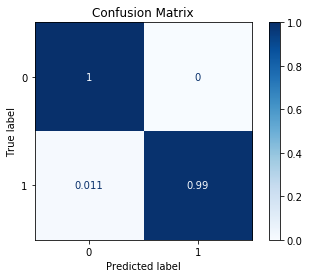

In [65]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

#disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true') # Prepares the confusion matrix of the classiﬁer by testing on test data X_test and true labels y_test. ● 
disp.ax_.set_title("Confusion Matrix") 
plt.show

##### Tune Hyperparameters for the best results with CV

In [91]:
from sklearn.model_selection import RandomizedSearchCV        

random_grid = {'n_estimators': [20,50, 100, 500, 1000,5000,10000],
              'max_features': ["log2", "auto"],
             'bootstrap': ['False', 'True']
             }

model_random = RandomizedSearchCV(estimator= model, param_distributions =random_grid, n_iter = 10, cv=3, verbose = 2, error_score = 'raise')
model_random.fit(X_train, y_train)

print("Results for the best hyperparameter")
print(model_random.best_params_)
model_random_results = model_random.cv_results_
print("REsults of randomized hyperparameter tuning")
print(model_random_results)
print("Best parameter score")
print(model_random.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=5000, max_features=log2, bootstrap=False ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=5000, max_features=log2, bootstrap=False, total=  14.1s
[CV] n_estimators=5000, max_features=log2, bootstrap=False ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.0s remaining:    0.0s


[CV]  n_estimators=5000, max_features=log2, bootstrap=False, total=  16.5s
[CV] n_estimators=5000, max_features=log2, bootstrap=False ...........
[CV]  n_estimators=5000, max_features=log2, bootstrap=False, total=  12.3s
[CV] n_estimators=20, max_features=log2, bootstrap=False .............
[CV]  n_estimators=20, max_features=log2, bootstrap=False, total=   0.1s
[CV] n_estimators=20, max_features=log2, bootstrap=False .............
[CV]  n_estimators=20, max_features=log2, bootstrap=False, total=   0.0s
[CV] n_estimators=20, max_features=log2, bootstrap=False .............
[CV]  n_estimators=20, max_features=log2, bootstrap=False, total=   0.1s
[CV] n_estimators=1000, max_features=auto, bootstrap=True ............
[CV]  n_estimators=1000, max_features=auto, bootstrap=True, total=   2.9s
[CV] n_estimators=1000, max_features=auto, bootstrap=True ............
[CV]  n_estimators=1000, max_features=auto, bootstrap=True, total=   2.9s
[CV] n_estimators=1000, max_features=auto, bootstrap=True

c:\users\laksh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\laksh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  n_estimators=10000, max_features=log2, bootstrap=True, total=  24.8s
[CV] n_estimators=10000, max_features=log2, bootstrap=True ...........
[CV]  n_estimators=10000, max_features=log2, bootstrap=True, total=  25.2s
[CV] n_estimators=10000, max_features=log2, bootstrap=True ...........
[CV]  n_estimators=10000, max_features=log2, bootstrap=True, total=  24.9s
[CV] n_estimators=100, max_features=log2, bootstrap=True .............
[CV]  n_estimators=100, max_features=log2, bootstrap=True, total=   0.3s
[CV] n_estimators=100, max_features=log2, bootstrap=True .............
[CV]  n_estimators=100, max_features=log2, bootstrap=True, total=   0.3s
[CV] n_estimators=100, max_features=log2, bootstrap=True .............
[CV]  n_estimators=100, max_features=log2, bootstrap=True, total=   0.3s
[CV] n_estimators=5000, max_features=auto, bootstrap=True ............
[CV]  n_estimators=5000, max_features=auto, bootstrap=True, total=  14.8s
[CV] n_estimators=5000, max_features=auto, bootstrap=Tru

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.3min finished


Results for the best hyperparameter
{'n_estimators': 5000, 'max_features': 'log2', 'bootstrap': 'False'}
REsults of randomized hyperparameter tuning
{'mean_fit_time': array([13.70651428,  0.04783821,  2.8523376 ,  0.07415231, 23.90064597,
        0.28245711, 14.30173898, 23.62024721,  2.46646253,  1.21547302]), 'std_fit_time': array([1.7407328 , 0.00416597, 0.02236018, 0.00471264, 0.15902811,
       0.00540337, 0.06307682, 0.16083821, 0.07872717, 0.02987256]), 'mean_score_time': array([0.58735824, 0.0104301 , 0.10281579, 0.        , 1.047791  ,
       0.01435399, 0.51169213, 1.02352015, 0.10029205, 0.05427694]), 'std_score_time': array([9.45637576e-02, 7.37520661e-03, 2.82519481e-03, 0.00000000e+00,
       2.72244152e-02, 4.09671758e-03, 1.92505576e-02, 6.93481811e-03,
       3.68459354e-05, 6.41561482e-03]), 'param_n_estimators': masked_array(data=[5000, 20, 1000, 20, 10000, 100, 5000, 10000, 1000, 500],
             mask=[False, False, False, False, False, False, False, False,
      

##### Listing the top 10 features using Gini Impurity

In [12]:
import itertools
features_dict = {}
for i in range(len(model.feature_importances_)):
    features_dict[Columnlist[i]] = model.feature_importances_[i]
sorted_feature_dict = sorted(features_dict.items(), key = lambda x:x[1], reverse = True)

i = 0
while (i<11):
    print(sorted_feature_dict[i])
    i +=1 
    
    


('TESPA1', 0.028067954645461548)
('SLC17A7', 0.02471463977652451)
('LINC00507', 0.02251233024398178)
('ANKRD33B', 0.020134464690719285)
('NPTX1', 0.01867383743584012)
('SLIT3', 0.017902651107984516)
('TBR1', 0.017671603848515766)
('LINC00508', 0.01749240973999223)
('SLIT3.1', 0.017486478403177297)
('LINC00152', 0.017348564981680328)
('MIR44351HG', 0.017260277223210156)


##### Using the model on 4 random data samples from the dataset

In [18]:
dfe2 = dfe1.iloc[298:302, :]
X1 = dfe2.drop("Label", axis = 1)
Y1 = dfe2["Label"]

print("Random Predictin Lables", collections.Counter(Y1))


prediction1 = model.predict(X1)

print("Confusion Matrix For Random Samples")
conf_matrix = confusion_matrix(Y1,prediction1)
print(conf_matrix)

print("Classification Report for Random Samples")
print(classification_report(Y1,prediction1))



Random Predictin Lables Counter({0: 3, 1: 1})
Confusion Matrix For Random Samples
[[3 0]
 [0 1]]
Classification Report for Random Samples
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Hyperparameter tuning and finding the best parameter

##### Modifying Feature list to inlcude only the top 5 features

In [87]:
columns = ['TESPA1','SLC17A7', 'LINC00507','ANKRD33B','NPTX1','Label']
dfe3 = pd.DataFrame(dfe1, columns=columns)

n2_samples,n2_features = dfe3.shape
print("Sample Size", n2_samples)


X2 = dfe3.drop("Label", axis = 1)
Y2 = dfe3["Label"]
print("Sample data with top 5 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model2 = RandomForestClassifier(n_estimators = 10000, max_features = "log2", bootstrap = True, oob_score = True)
model2.fit(X2_train, y2_train)

scores2 = cross_val_score(model2, X2_train, y2_train, cv=4)
print("Cross Validation Scores:",scores)


print("Mean score and the 95% confidence interval of the score estimate \n \n")
print("Cross Validation Score: %0.3f (+/- %0.3f) \n \n" % (scores2.mean(), scores2.std() *2))

print("Out-Of-Bag Error Estimate: {:.3f} \n \n".format(model2.oob_score_))

prediction2 = model2.predict(X2_test)


print("Confusion Matrix \n \n")
conf_matrix2 = confusion_matrix(y2_test,prediction2)
print(conf_matrix2)

print("Classification Report \n \n")
print(classification_report(y2_test,prediction2))





#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size =0.3, shuffle =True)
#model1 = RandomForestClassifier(n_estimators =1000, max_features = "log2", bootstrap = True, oob_score = True) 
#model1.fit(X1_train,y1_train)

Sample Size 871
Sample data with top 5 features 
 
 <bound method NDFrame.head of          TESPA1     SLC17A7   LINC00507    ANKRD33B       NPTX1
0    590.644984   58.063405  130.142115   64.069964  138.150861
1    407.388380  122.417198  151.516368  122.417198   13.044455
2    406.110148   52.271603  331.723636  122.637223    2.010446
3    214.304903   23.140905  449.738458   64.392083  103.631009
4    288.652933   33.074815  527.192510   25.056678    2.004534
..          ...         ...         ...         ...         ...
866    0.000000    0.000000    1.010026    0.000000    1.010026
867    0.000000    1.007509    0.000000    0.000000    0.000000
868    1.027866    0.000000    0.000000    0.000000    0.000000
869    0.000000    0.000000    0.000000    0.000000    0.000000
870    0.000000    0.000000    0.000000    0.000000    0.000000

[871 rows x 5 columns]>
Cross Validation Scores: [1.         0.99342105 0.99342105 0.99342105]
Mean score and the 95% confidence interval of the scor

##### Plotting the Validation graph for n_estimators with CV

n_estimator values tested [20, 50, 100, 500, 1000, 2000, 5000, 7000, 8000, 10000]
Train Mean =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test Mean =  [0.99178982 0.99178982 0.99507389 0.99507389 0.99507389 0.99343186
 0.99343186 0.99507389 0.99507389 0.99343186]


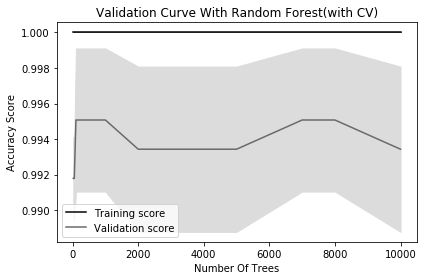

In [100]:
# listing param range
param_range = [20,50,100,500,1000,2000,5000,7000, 8000,10000]

print("n_estimator values tested", param_range)

#CAlculate accuracy of training and test data

train_scores, test_scores =  validation_curve(RandomForestClassifier(), X_train, y_train, param_range = param_range, 
                                              param_name = "n_estimators", scoring = "accuracy", cv=3 )

#calculate mean and std of training scores

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis =1)

print("Train Mean = " , train_mean)

#calculate mean and std of training scores

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis =1)

print("Test Mean = " , test_mean)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest(with CV)")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()




n_estimator values tested [20, 50, 100, 500, 1000, 2000, 5000, 7000, 8000, 10000]
Train Mean =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test Mean =  [0.98360656 0.98360656 0.98360656 0.98360656 0.98360656 0.98360656
 0.98360656 0.98360656 0.98360656 0.98360656]


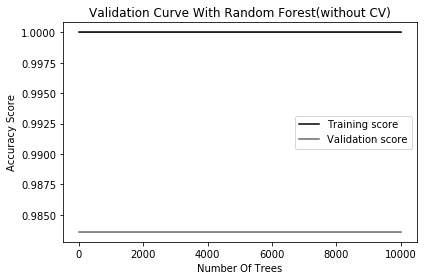

In [96]:
from sklearn.model_selection import ShuffleSplit
# listing param range
param_range = [20,50,100,500,1000,2000,5000,7000, 8000,10000]

print("n_estimator values tested", param_range)

#CAlculate accuracy of training and test data

train_scores, test_scores =  validation_curve(RandomForestClassifier(), X_train, y_train, param_range = param_range, 
                                              param_name = "n_estimators", scoring = "accuracy", cv=ShuffleSplit(n_splits=1))

#calculate mean and std of training scores

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis =1)

print("Train Mean = " , train_mean)

#calculate mean and std of training scores

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis =1)

print("Test Mean = " , test_mean)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest(without CV)")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()